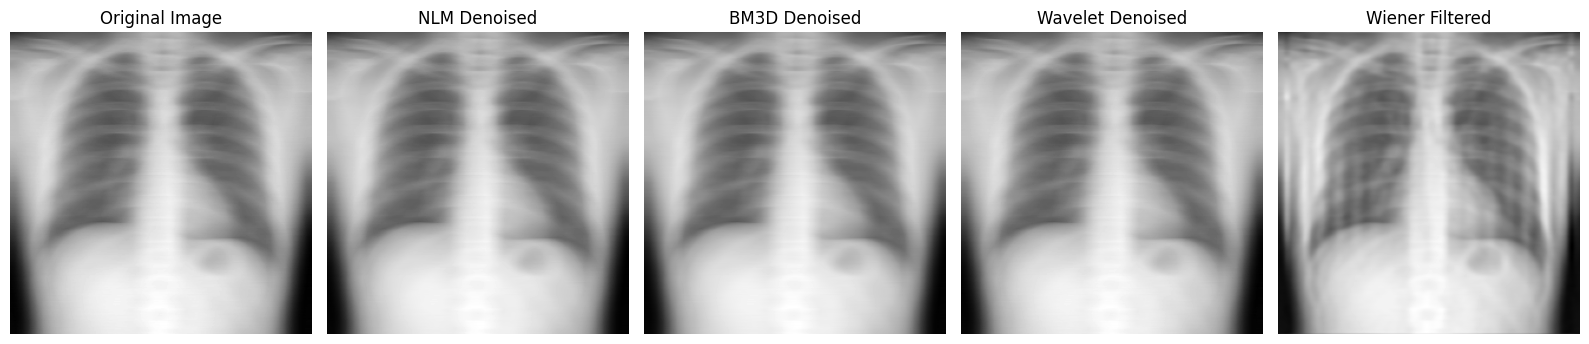

In [1]:
# Step 1: Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_wavelet
from bm3d import bm3d, BM3DStages, BM3DProfile
from skimage.restoration import wiener

# Step 2: Load a Real Noisy Medical Image (Grayscale)
img = cv2.imread('xray_motion_blur.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # Resize for uniformity
img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]

# Step 3: Estimate Noise Standard Deviation (for NLM/BM3D)
sigma_est = np.mean(estimate_sigma(img, channel_axis=None))

# Step 4: Apply Denoising Techniques

## 4.1 Non-Local Means (NLM) — good for random/quantum noise
nlm_denoised = denoise_nl_means(img, h=1.15 * sigma_est,
                                fast_mode=True, patch_size=5,
                                patch_distance=6, channel_axis=None)

## 4.2 BM3D — very good for Gaussian noise
bm3d_denoised = bm3d(img, sigma_psd=sigma_est,
                     stage_arg=BM3DStages.HARD_THRESHOLDING,
                     profile=BM3DProfile())

## 4.3 Wavelet Denoising — retains structure well
wavelet_denoised = denoise_wavelet(img, sigma=sigma_est,
                                    mode='soft', channel_axis=None, rescale_sigma=True)

## 4.4 Wiener Filtering — works well for blurry images or motion artifacts
psf = np.ones((1, 15)) / 15  # horizontal motion blur kernel
wiener_denoised = wiener(img, psf, balance=0.1)

# Step 5: Show All Results
def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(16, 4))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(
    [img, nlm_denoised, bm3d_denoised, wavelet_denoised, wiener_denoised],
    ['Original Image', 'NLM Denoised', 'BM3D Denoised', 'Wavelet Denoised', 'Wiener Filtered']
)


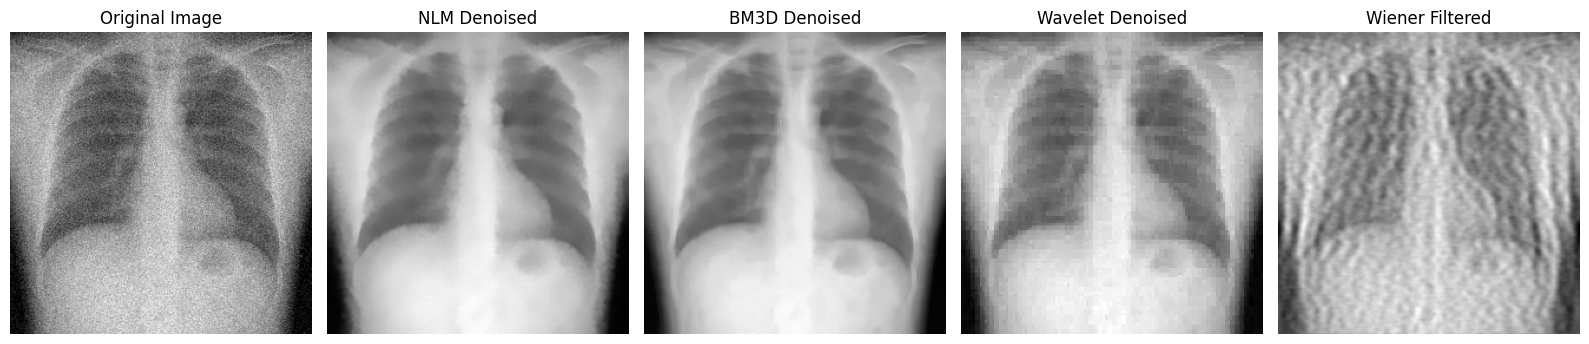

In [3]:
# Step 1: Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_wavelet
from bm3d import bm3d, BM3DStages, BM3DProfile
from skimage.restoration import wiener

# Step 2: Load a Real Noisy Medical Image (Grayscale)
img = cv2.imread('xray_gaussian_noise.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # Resize for uniformity
img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]

# Step 3: Estimate Noise Standard Deviation (for NLM/BM3D)
sigma_est = np.mean(estimate_sigma(img, channel_axis=None))

# Step 4: Apply Denoising Techniques

## 4.1 Non-Local Means (NLM) — good for random/quantum noise
nlm_denoised = denoise_nl_means(img, h=1.15 * sigma_est,
                                fast_mode=True, patch_size=5,
                                patch_distance=6, channel_axis=None)

## 4.2 BM3D — very good for Gaussian noise
bm3d_denoised = bm3d(img, sigma_psd=sigma_est,
                     stage_arg=BM3DStages.HARD_THRESHOLDING,
                     profile=BM3DProfile())

## 4.3 Wavelet Denoising — retains structure well
wavelet_denoised = denoise_wavelet(img, sigma=sigma_est,
                                    mode='soft', channel_axis=None, rescale_sigma=True)

## 4.4 Wiener Filtering — works well for blurry images or motion artifacts
psf = np.ones((1, 15)) / 15  # horizontal motion blur kernel
wiener_denoised = wiener(img, psf, balance=0.1)

# Step 5: Show All Results
def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(16, 4))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(
    [img, nlm_denoised, bm3d_denoised, wavelet_denoised, wiener_denoised],
    ['Original Image', 'NLM Denoised', 'BM3D Denoised', 'Wavelet Denoised', 'Wiener Filtered']
)


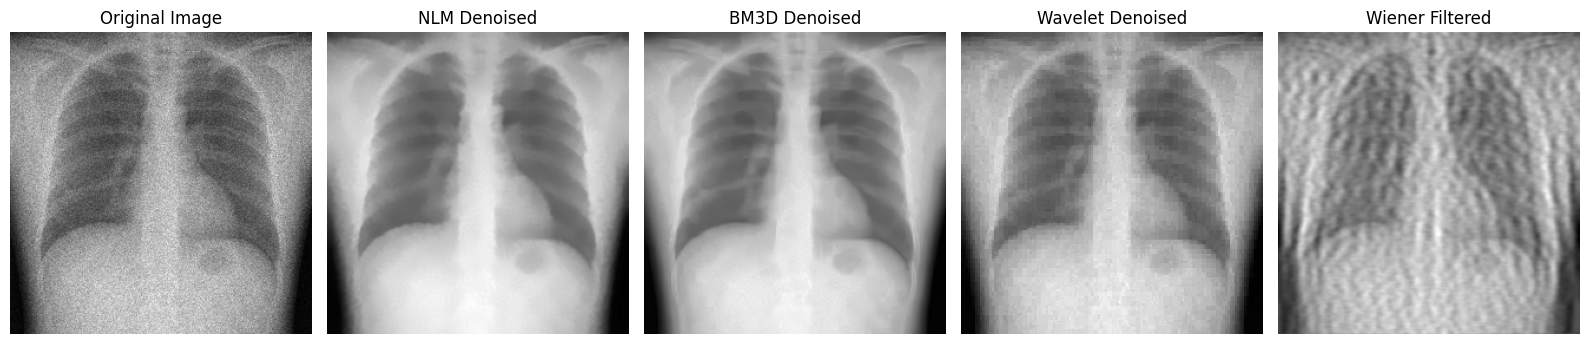

In [4]:
# Step 1: Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_wavelet
from bm3d import bm3d, BM3DStages, BM3DProfile
from skimage.restoration import wiener

# Step 2: Load a Real Noisy Medical Image (Grayscale)
img = cv2.imread('xray_quantum_noise.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # Resize for uniformity
img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]

# Step 3: Estimate Noise Standard Deviation (for NLM/BM3D)
sigma_est = np.mean(estimate_sigma(img, channel_axis=None))

# Step 4: Apply Denoising Techniques

## 4.1 Non-Local Means (NLM) — good for random/quantum noise
nlm_denoised = denoise_nl_means(img, h=1.15 * sigma_est,
                                fast_mode=True, patch_size=5,
                                patch_distance=6, channel_axis=None)

## 4.2 BM3D — very good for Gaussian noise
bm3d_denoised = bm3d(img, sigma_psd=sigma_est,
                     stage_arg=BM3DStages.HARD_THRESHOLDING,
                     profile=BM3DProfile())

## 4.3 Wavelet Denoising — retains structure well
wavelet_denoised = denoise_wavelet(img, sigma=sigma_est,
                                    mode='soft', channel_axis=None, rescale_sigma=True)

## 4.4 Wiener Filtering — works well for blurry images or motion artifacts
psf = np.ones((1, 15)) / 15  # horizontal motion blur kernel
wiener_denoised = wiener(img, psf, balance=0.1)

# Step 5: Show All Results
def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(16, 4))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(
    [img, nlm_denoised, bm3d_denoised, wavelet_denoised, wiener_denoised],
    ['Original Image', 'NLM Denoised', 'BM3D Denoised', 'Wavelet Denoised', 'Wiener Filtered']
)
